In [1]:
%matplotlib inline

<div class="document" id="seam-carving">
<h1 class="title">Seam Carving</h1>
<p>This example demonstrates how images can be resized using seam carving [1].
Resizing to a new aspect ratio distorts image contents. Seam carving attempts
to resize <em>without</em> distortion, by removing regions of an image which are less
important. In this example we are using the Sobel filter to signify the
importance of each pixel.</p>
<table class="docutils footnote" frame="void" id="id1" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label">[1]</td><td>Shai Avidan and Ariel Shamir
&quot;Seam Carving for Content-Aware Image Resizing&quot;
<a class="reference external" href="http://www.cs.jhu.edu/~misha/ReadingSeminar/Papers/Avidan07.pdf">http://www.cs.jhu.edu/~misha/ReadingSeminar/Papers/Avidan07.pdf</a></td></tr>
</tbody>
</table>
</div>


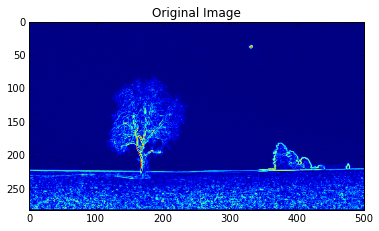

In [2]:
from skimage import data, draw
from skimage import transform, util
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageEnhance

hl_color = np.array([0, 1, 0])
img = Image.open("countryside.jpg") 
#img = data.rocket()
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))

plt.title('Original Image')
plt.imshow(eimg)



<div class="document">
</div>


In [3]:
rows, columns = np.where(eimg ==eimg.max())
print rows, columns

[194] [163]


<div class="document">
</div>


In [5]:
from skimage import transform
out = transform.seam_carve(img, eimg, 'vertical', 200)
plt.figure()
plt.title('Resized using Seam-Carving')
plt.imshow(out)

AttributeError: 'module' object has no attribute 'seam_carve'

<div class="document">
<p>As you can see, resizing as distorted the rocket and the objects around,
whereas seam carving has reszied by removing the empty spaces in between.</p>
<div class="section" id="object-removal">
<h1>Object Removal</h1>
<p>Seam Carving can also be used to remove atrifacts from images. To do that, we
have to ensure that pixels to be removes get less importance. In the following
code I approximately mark the rocket with a mask, and then decrease the
importance of those pixels</p>
</div>
</div>


In [6]:

masked_img = img.copy()

poly = [(404, 281), (404, 360), (359, 364), (338, 337), (145, 337), (120, 322),
        (145, 304), (340, 306), (362, 284)]
pr = np.array([p[0] for p in poly])
pc = np.array([p[1] for p in poly])
rr, cc = draw.polygon(pr, pc)

masked_img[rr, cc, :] = masked_img[rr, cc, :]*0.5 + hl_color*.5
plt.figure()
plt.title('Object Marked')

plt.imshow(masked_img)


IndexError: index 281 is out of bounds for axis 0 with size 281

<div class="document">
</div>


In [7]:

eimg[rr, cc] -= 1000

plt.figure()
plt.title('Object Removed')
out = transform.seam_carve(img, eimg, 'vertical', 90)
resized = transform.resize(img, out.shape)
plt.imshow(out)
plt.show()


IndexError: index 281 is out of bounds for axis 0 with size 281

<div class="document">
</div>
